Link to Medium blog post: https://pub.towardsai.net/an-overview-of-data-preprocessing-converting-variables-column-transformers-onehotencoding-9ff521362159

## 1. Categorical Variables

The columns in the dataset are ready to be processed by the algorithm, they can be presented continuously (continuous features), or they can be presented without variation continuously, for example, when we consider the iris dataset, a flower is either Iris Setosa, Iris Versicolor or Iris Virginia. It cannot be of any value in the middle of these types. Such datasets are called categorical features and it is necessary to make these columns suitable for the algorithm (convert categorical to numeric data). These methods are explained below and implemented in python.

### 1.1. Column Transformers, One Hot Encoding, and Dummy Coding

The processes for the categorical column and the numerical column are not the same. With Column Transformers, multiple different preprocessing operations can be performed on the columns in the dataset at the same time.

OneHotEncoding turns each type of categorical data into a column and makes the dataset numeric. For example, in the dataset, it adds 2 new columns, male and female, instead of the male/female option in the sex column, and for female data: the male option assigns 0 and female option 1 and vice versa.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
IN[1]
data=pd.read_csv('toy_dataset.csv')
data

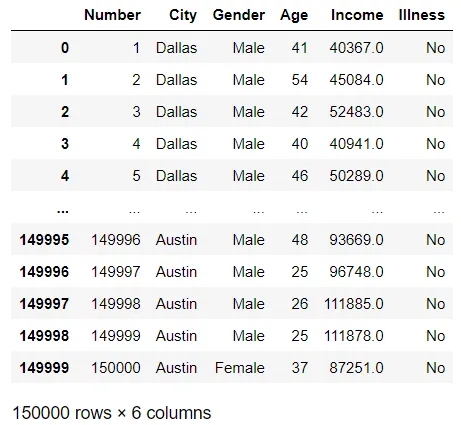

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
IN[2]
ohe=OneHotEncoder(sparse=False)
scaler = MinMaxScaler()
ct=make_column_transformer((ohe,['City','Gender','Illness']),
                      (scaler,  ['Income']),remainder='passthrough')
data_ct=ct.fit_transform(data)
data_ct

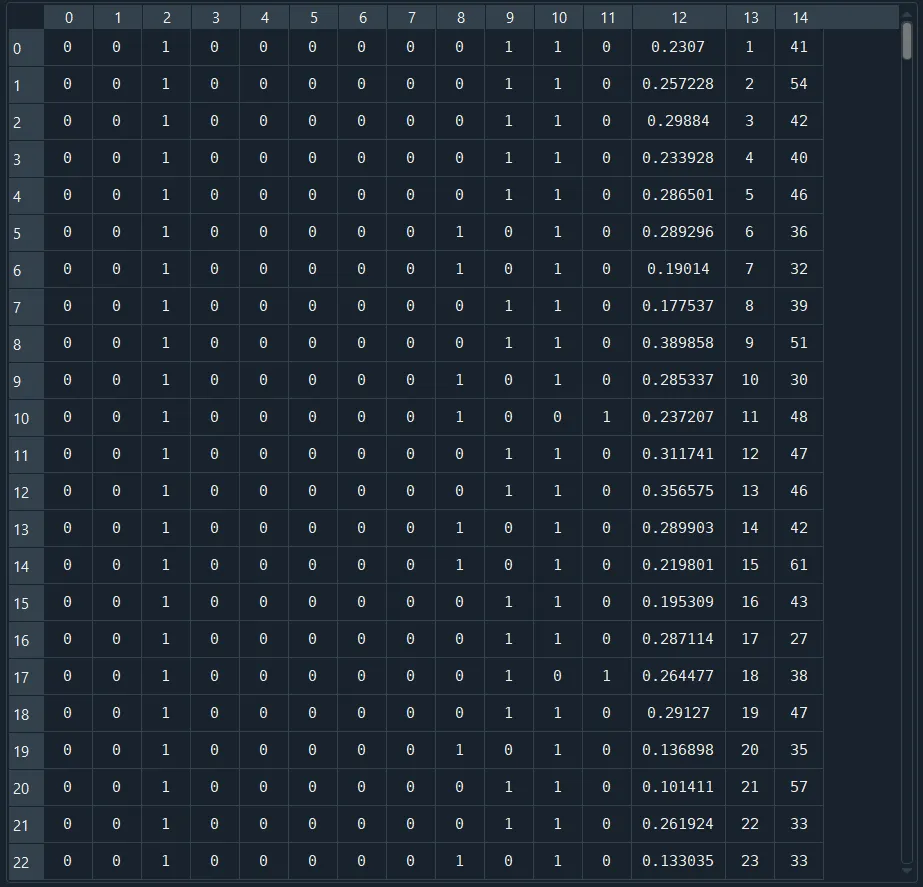

In [ ]:
IN[3]
ohe_True=OneHotEncoder(sparse=True)
ohe_with_sparse=ohe_True.fit_transform(data['Gender'].values.reshape(-1,1)).toarray()
ohe_with_sparse
OUT[3]
array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

The same procedure is done with pandas.get_dummies in Pandas. However, OneHotEncoder is preferred for machine learning studies. Because OneHotEncoder is from the transformer class and is applied with the fit command. Once it is applied, it can transform the next data according to the categories it has learned, and it is easy to use with the pipeline.



In [ ]:
IN[4]
dum=pd.get_dummies(data,columns=['Gender','City','Illness'],prefix='',prefix_sep='')

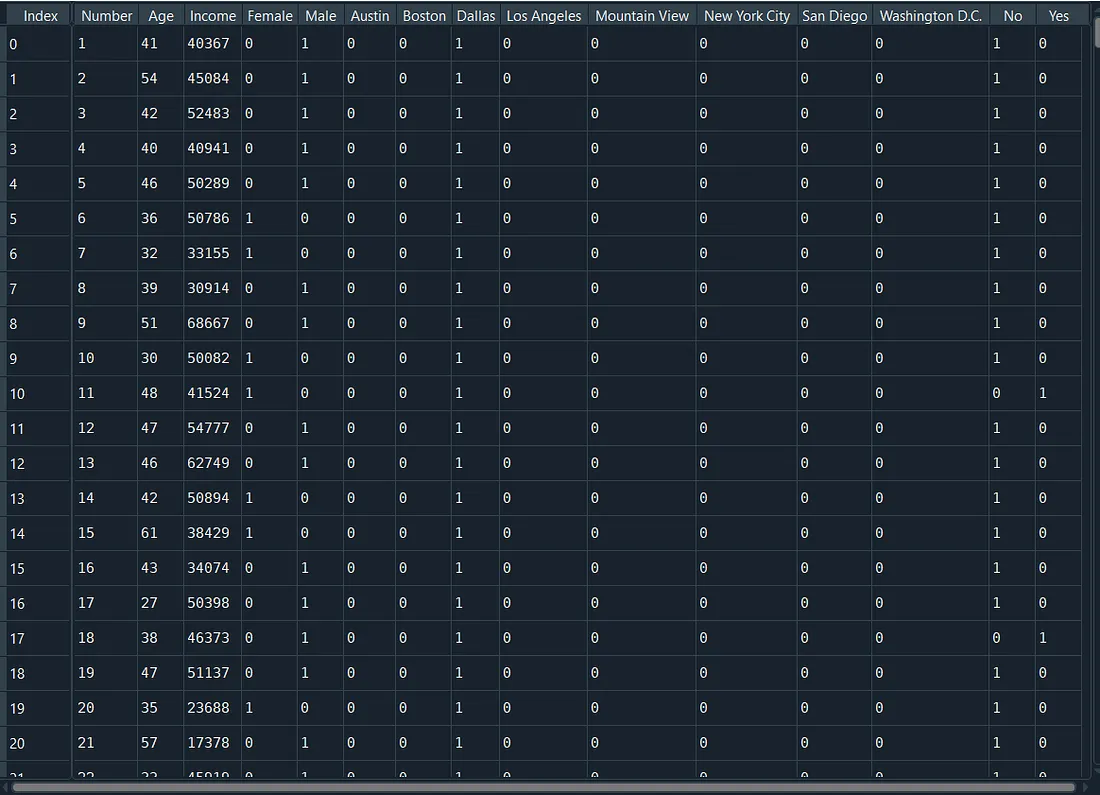

Now let’s look at the OneHotEncoder hyperparameters.

- Sparse: Due to the dataset include a lot of “0” values sparse is defined as 0. However, when Sparse=False is set and .toarray() is added, the dataset can be readable.
- Handle_unknown: When this parameter is set to ‘ignore’ and an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros.

### 1.2. Label Encoder

Categorical data is turned into numeric starting from 0 and increasing arithmetically. For example, a column containing red, white, blue data; Change 0 corresponds red, 1 corresponds white and 3 corresponds blue.

In [ ]:
IN[5]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded_data_city=le.fit_transform(data['City'])
print("Cities",np.unique(encoded_data_city))
encoded_data_gender=le.fit_transform(data['Gender'])
print("Gender",np.unique(encoded_data_gender))
OUT[5]
Cities [0 1 2 3 4 5 6 7]
Gender [0 1]

### 1.3. Ordinal Encoder


Ordinal Encoder does the same as Label Encoder. The difference between Ordinal Encoder is used for features although Label Encoder is used Labels(targets) so that Ordinal Encoder fit the data with (number_of_samples, number_of_features) while Label Encoder (number_of_samples)

In [ ]:
IN[6]
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[dictionary])
encoded_data_city=oe.fit_transform(data[['City']])
print("Cities", np.unique(encoded_data_city))
OUT[6]
Cities [0. 1. 2. 3. 4. 5. 6. 7.]

### 1.4. Label Binarizer

Label Binarizer has the same functionality as OneHotEncoding. The difference is that OHE is used for multicolumn data while LabelBinarizer is used for a single column only. It is used for a single column in LabelEncoder.

In [ ]:
IN[7]
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
label_city=lb.fit_transform(data['City'])
label_city
OUT[7]
array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

## 2. Numeric Variables

Rescaling Numeric Variables is very important for the algorithm to give more accurate results. Thanks to Rescale, all numeric data are sorted between a certain range according to certain rules. Let’s take a look at these methods now.

### 2.1. Standardization

The average value of the column is assigned 0 and all other numeric values are surrounded by variance 1.

In [ ]:
IN[8]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardscaler=scaler.fit_transform(data[['Income']])
data_standardscaler
OUT[8]
array([[-2.03629388],
       [-1.84753398],
       [-1.55144865],
       ...,
       [ 0.82563756],
       [ 0.82535744],
       [-0.16013972]])

### 2.2. Normalization

The numeric data in the column are distributed between 0 and 1, with the minimum data being 0 and the maximum data being 1.

In [ ]:
IN[9]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_minmaxscaler=scaler.fit_transform(data[['Income']])
data_minmaxscaler

OUT[9}
array([[0.23070001],
       [0.25722818],
       [0.29883978],
       ...,
       [0.6329136 ],
       [0.63287423],
       [0.49437324]])

### 2.3. L² Regularization

L2 normalization is also known as the Euclidian norm. All data is placed between -1 and 1.

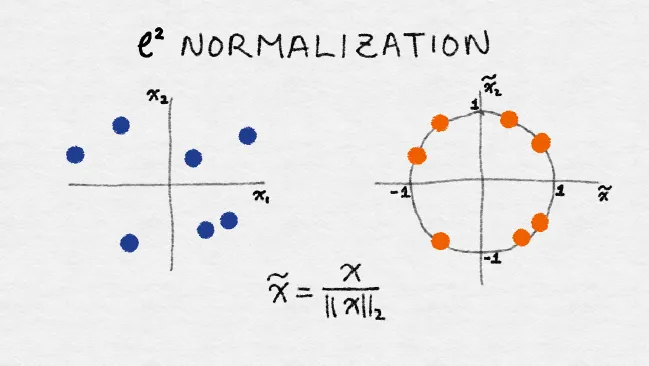

### 2.4. Robust Scaler

Median value and Inter Quantile Range(IQR) is calculated.

new_x(i) = [x(i) — median_value]/IQR

In [ ]:
IN[10]
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_robust=scaler.fit_transform(data[['Income']])
data_robust
OUT[10]
array([[-2.2530733 ],
       [-2.05363353],
       [-1.74079594],
       ...,
       [ 0.77078379],
       [ 0.77048782],
       [-0.27076793]])